### Predicting the Sale price of Bulldozers using Machine Learning

In this project, we're going to predict the sale price of Bulldozers using the Regression

##### 1. Problem Definition
> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

##### 2. Data
Data is being download from Kaggle Competition https://www.kaggle.com/c/bluebook-for-bulldozers/data .

The data has three parts:

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

##### 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on evaluation of this project check the link below:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal of most regression evaluation metrics is to minimize the error between target and the predicted value.

##### 4. Features
You can find the detail data dictionary with all the features in the Kaggle from below link:
https://www.kaggle.com/c/bluebook-for-bulldozers/data

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
# import training and validation data sets
df_train = pd.read_csv(r"E:\DS\files\data\bluebook-for-bulldozers\TrainAndValid.csv",
                          low_memory=False)
df_train.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null object
saledate                    412698 non-null object
fiModelDesc                 412698 non-null object
fiBaseModel                 412698 non-null object
fiSecondaryDesc             271971 non-null object
fiModelSeries               58667 non-null object
fiModelDescriptor           74816 non-null object
ProductSize                 196093 non-null object
fiProductClassDesc          412698 non-null object
state                      

In [229]:
df_train.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

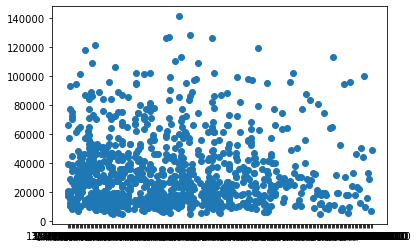

In [230]:
fig, ax = plt.subplots()
ax.scatter(df_train['saledate'][:1000],df_train['SalePrice'][:1000])

Text(0.5, 0, 'Sale Price of BullDozer')

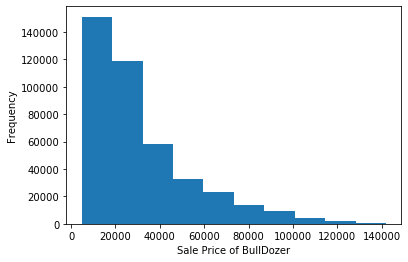

In [231]:
df_train.SalePrice.plot.hist()
plt.xlabel("Sale Price of BullDozer")

#####  Parsing dates
When working with time series data, we want to enrich the time & date component as much as possible.
We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [233]:
df_train.saledate.dtypes

dtype('O')

In [234]:
## import data again but this time parse dates
df_train = pd.read_csv(r"E:\DS\files\data\bluebook-for-bulldozers\TrainAndValid.csv",
                low_memory=False,
                parse_dates=['saledate'])

In [235]:
df_train.saledate.dtypes

dtype('<M8[ns]')

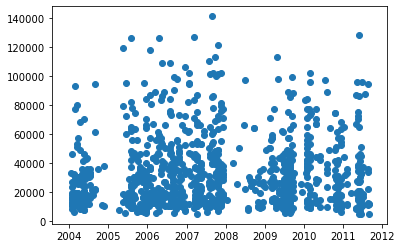

In [236]:
fig, ax = plt.subplots()
ax.scatter(df_train['saledate'][:1000],df_train['SalePrice'][:1000])

In [237]:
df_train.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


#####  Sort DataFrame by saledate
When working with time series data, it's a good idea to sort it by date.

In [238]:
# Sort DataFrame in data order
df_train.sort_values(by=['saledate'],inplace=True,ascending=True)

In [239]:
df_train.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [240]:
# Make a copy of the original dataFrame
df_tmp = df_train.copy()

##### Add datetime parameters for `saledate` column

In [241]:
df_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

In [242]:
df_tmp[:3].saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [243]:
df_tmp[:3].saledate.dt.dayofweek

205615    1
274835    1
141296    1
Name: saledate, dtype: int64

In [244]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [245]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [246]:
# dropping the saledate
df_tmp.drop("saledate",axis=1,inplace=True)

In [247]:
df_tmp.state.value_counts()[:5]

Florida       67320
Texas         53110
California    29761
Washington    16222
Georgia       14633
Name: state, dtype: int64

##### Converting string into categories

Link for different datatypes compatible with pandas:
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html

In [248]:
pd.api.types.is_string_dtype(df_tmp.UsageBand)

True

In [249]:
# Find the columns which contains strings
print("Features with string datatype: ")
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Features with string datatype: 
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [250]:
# this will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [251]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null category
fiModelDesc                 412698 non-null category
fiBaseModel                 412698 non-null category
fiSecondaryDesc             271971 non-null category
fiModelSeries               58667 non-null category
fiModelDescriptor           74816 non-null category
ProductSize                 196093 non-null category
fiProductClassDesc          412698 non-null category
state                       412698 non-null category
Prod

In [252]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [253]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [254]:
# Check the missing data
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

##### Save preprocessed data

In [255]:
import os
os.getcwd()

'C:\\Users\\SarboPc\\OneDrive\\dataScience\\DataScience\\BullDozer Regression prediction'

In [256]:
# Export current tmp dataFrame
df_tmp.to_csv('../data/bluebook-for-bulldozer/train_tmp.csv',
             index=False)

In [257]:
# import the new dataset
df_tmp = pd.read_csv('../data/bluebook-for-bulldozer/train_tmp.csv',
                    low_memory=False)
df_tmp.head(3).T

,0,1,2
SalesID,1646770,1821514,1505138
SalePrice,9500,14000,50000
MachineID,1126363,1194089,1473654
ModelID,8434,10150,4139
datasource,132,132,132
auctioneerID,18,99,99
YearMade,1974,1980,1978
MachineHoursCurrentMeter,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G


##### Filling missing  values
**Filling numerical missing values first**

In [258]:
for label,conten in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [259]:
df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [260]:
# Checking for numeric columns containing null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
         

auctioneerID
MachineHoursCurrentMeter


In [261]:
# Checking for numeric columns containing null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())
            

In [262]:
df_tmp.MachineHoursCurrentMeter_is_missing.value_counts()

True     265194
False    147504
Name: MachineHoursCurrentMeter_is_missing, dtype: int64

***Filling and turning categorical variables into numbers***

In [263]:
# Find the columns which contains categorical varibales
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #print(label)
        print(label,":",content.isnull().sum())

UsageBand : 339028
fiModelDesc : 0
fiBaseModel : 0
fiSecondaryDesc : 140727
fiModelSeries : 354031
fiModelDescriptor : 337882
ProductSize : 216605
fiProductClassDesc : 0
state : 0
ProductGroup : 0
ProductGroupDesc : 0
Drive_System : 305611
Enclosure : 334
Forks : 214983
Pad_Type : 331602
Ride_Control : 259970
Stick : 331602
Transmission : 224691
Turbocharged : 331602
Blade_Extension : 386715
Blade_Width : 386715
Enclosure_Type : 386715
Engine_Horsepower : 386715
Hydraulics : 82565
Pushblock : 386715
Ripper : 305753
Scarifier : 386704
Tip_Control : 386715
Tire_Size : 315060
Coupler : 192019
Coupler_System : 367724
Grouser_Tracks : 367823
Hydraulics_Flow : 367823
Track_Type : 310505
Undercarriage_Pad_Width : 309782
Stick_Length : 310437
Thumb : 310366
Pattern_Changer : 310437
Grouser_Type : 310505
Backhoe_Mounting : 331986
Blade_Type : 330823
Travel_Controls : 330821
Differential_Type : 341134
Steering_Controls : 341176


In [264]:
pd.Categorical(df_tmp['state']).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
                 ordered=False)

In [265]:
pd.Categorical(df_tmp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [266]:
pd.Categorical(df_tmp['state']).codes +1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [267]:
pd.Categorical(df_tmp['UsageBand']).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [268]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary column to indicate whether sample had missing value
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes +1

In [269]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [270]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [271]:
df_tmp.isna().sum()[:20]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

### 5. Modeling

In [272]:
%%time
'''
# Instantiate model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])7
'''

Wall time: 0 ns


'\n# Instantiate model\nfrom sklearn.ensemble import RandomForestRegressor\n\nmodel = RandomForestRegressor(n_jobs=-1,\n                             random_state=42)\n\n# Fit the model\nmodel.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])7\n'

In [273]:
# Score the model
#model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

**Question:** Why the above metric not reliable?
* Because the its predicting based on the data that the model has already seen. So, the model hasn't generalized.

In [274]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val),len(df_train)

(11573, 401125)

In [276]:
# Split data into X & y
X_train,y_train = df_train.drop("SalePrice",axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice",axis=1), df_val.SalePrice

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

#### Building an evaluation function

In [277]:
# Create evaluation function (the competition used RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test,y_preds):
    """
        Calculates root mean squared log error between predictons and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
             "Valid MAE": mean_absolute_error(y_valid,val_preds),
             "Training RMSLE": rmsle(y_train,train_preds),
              "VAlid RMSLE": rmsle(y_valid,val_preds),
              "Training R^2": r2_score(y_train,train_preds),
              "Valid R^2": r2_score(y_valid,val_preds)}
    
    return scores

##### Testing our model on a subset( to tune the hyperparameters)

In [279]:
len(X_train)

401125

In [281]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [282]:
%%time
# for improving train time for the base model we used max_samples =10000
model.fit(X_train,y_train)

Wall time: 5.88 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [283]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'VAlid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

#### Hyperparameter tuning with RandomizedSearchCV

In [288]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features":[0.5,1,"sqrt",'auto'],
           "max_samples": [10000]}

# instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter=20,
                              cv=5,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.4min finished


Wall time: 5min 27s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [290]:
# find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [287]:
# Evaluate the RandomizedSearchCV model
show_scores(rs_model)

{'Training MAE': 8797.020106924543,
 'Valid MAE': 10548.692000051797,
 'Training RMSLE': 0.3841183419759492,
 'VAlid RMSLE': 0.4176033402595049,
 'Training R^2': 0.6863868962908309,
 'Valid R^2': 0.6767978578604246}

#### Train a model with the best hyperparameters
**Note:** These were found after 100 iterations of `RandomizedSearchCV

In [289]:
%%time
#Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42) # so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train,y_train)

Wall time: 30.1 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [291]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'VAlid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

#### Make predictions on test data

In [308]:
df_test = pd.read_csv(r'E:\DS\files\data\bluebook-for-bulldozers\Test.csv',
                     low_memory=False,
                     parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [296]:
# Make predictions on the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
SalesID                     12457 non-null int64
MachineID                   12457 non-null int64
ModelID                     12457 non-null int64
datasource                  12457 non-null int64
auctioneerID                12457 non-null int64
YearMade                    12457 non-null int64
MachineHoursCurrentMeter    2129 non-null float64
UsageBand                   1834 non-null object
saledate                    12457 non-null datetime64[ns]
fiModelDesc                 12457 non-null object
fiBaseModel                 12457 non-null object
fiSecondaryDesc             8482 non-null object
fiModelSeries               2006 non-null object
fiModelDescriptor           3024 non-null object
ProductSize                 6048 non-null object
fiProductClassDesc          12457 non-null object
state                       12457 non-null object
ProductGroup                12457 non-null o

#### Preprocessing the test data as well

In [309]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df
    """
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    
    df.drop('saledate',axis=1,inplace=True)
    
    # fill the numeric rows with median
    
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing
                df[label+'_is_missing'] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    # fill the categorical missing data and turn categories into numbers
        elif not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing values as -1
            df[label] = pd.Categorical(content).codes +1
    
    return df

In [310]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [311]:
# We can find how the columns differ using sets
set(X_train.columns) -set(df_test.columns)


{'auctioneerID_is_missing'}

In [312]:
# So, manually adjust df_test to have auctioneerID_is_missing column
df_test['auctioneerID_is_missing'] =False
df_test.head(2)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False


In [313]:
# Make prediction on test data
test_preds= ideal_model.predict(df_test)

In [314]:
test_preds

array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

In [315]:
# Formatting predictions according to Kaggle submission
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


##### Feature Importance
Feature importance seeks to figure out which different attributes of the data were most important with respect to target variable(SalePrice).

In [ ]:
ideal_model.feature_importances_

In [320]:
# helper function for plotting feature importance
def plot_features(columns,importances,n=20):
    df =(pd.DataFrame ({'features':columns,
                        'feature_importances': importances})
        .sort_values("feature_importances",ascending=False)
        .reset_index(drop=True))
    
    #plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

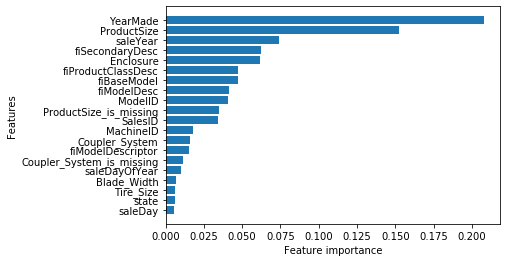

In [321]:
plot_features(X_train.columns,ideal_model.feature_importances_)